# Kisailus Biomimetics & Nanostructured Materials Lab Non Planar GCode

Written by Adrian Ornelas for avian bone inspired drone cage impact protection bumper

## Theory

Inside avian bones, two major features occur in the thin walled ellipsoid that greatly decrease the maximum stress and reduce local buckling: Ridges and Struts. In order to manufacture an avian bone inspired bumper, we require 3 major parts: the thin walled ellipsoid (mimiced with Epoxy), Struts (mimiced in nylon rods manufactured in this program), and ridges (along direction of rod mimiced with a lightweight fiber matrix). The struts discussed function best at an angle, this program will parametrically create nonplanar GCode based on specified parameters in order to make a manufacturable strut "skeleton" to create the synthetic avian bone.

## Design

In order to mimic struts using additive manufacturing techniques, custom G-Code is written for the Ender 2 Pro and Ultimaker S5 to be able to print in all 3 cartesian directions simulataneously. By doing this we avoid the common additive manufacturing problem of poor layer adhesion negatively impacted curved components.

### Implementation Plan

- Implement n-gon arcs that follow points in 2D
- Translate points by an angle across Z
- Given collection of movements, create GCode encoding instrutions

First Commit 🥳

## Creating 2D Ellipsoid arcs

Given resolution, flattening, and arc sweep, this creates different sized arcs between two points

### Flattening for an ellipse

$f = \frac{a-b}{a}$

$f$ is valid from 0 to 1 and determines the dimension of the height of the created ellipsoid (0 is a circle and 1 is flat against z axis)

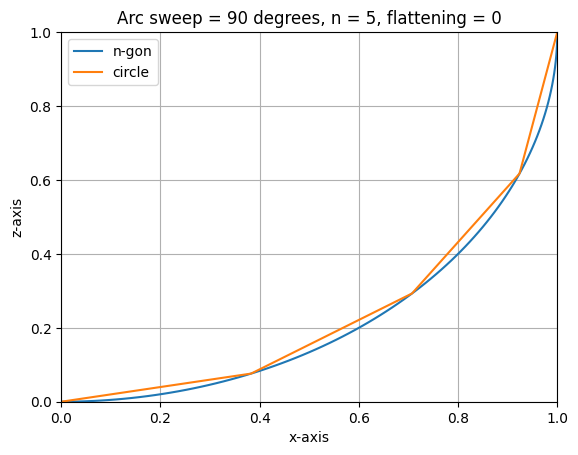

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.axes(projection = None)

n_sides = 5
arc_sweep_deg = 90
flattening = 0

# Create a circular arc with n_sides

r_min = 1 - flattening
arc_sweep = np.deg2rad(arc_sweep_deg)
arc_offset_deg = 270
arc_offset = np.deg2rad(arc_offset_deg)
angles = np.linspace(arc_offset, arc_offset + arc_sweep, n_sides, endpoint=True)

points_x = np.cos(angles)
points_z = np.sin(angles)
points_z += 1
points_z *= r_min

# True geometry

theta = np.linspace(arc_offset, arc_offset + arc_sweep, 100)
circle_x = np.cos(theta)
circle_y = np.sin(theta)
circle_y += 1
circle_y *= r_min

# Plot n-gon and circle

plt.grid()
plt.plot(circle_x, circle_y, '-',points_x, points_z, '-')
plt.title(f'Arc sweep = {arc_sweep_deg} degrees, n = {n_sides}, flattening = {flattening}')
plt.legend(['n-gon', 'circle'])
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('x-axis')
plt.ylabel('z-axis')
plt.show()

## Translating 2D N-Gon into 3D

Project the 2D N-Gon curve into two planes creating a 3D curve (Linear in Z and defined by angle Psi)

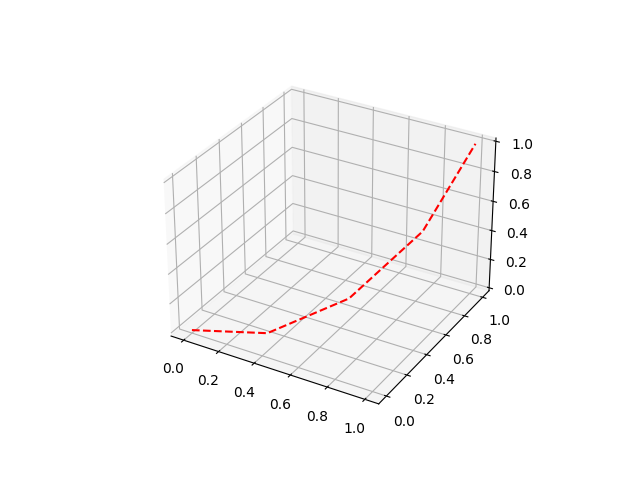

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget


# Plot Sphere

fig = plt.figure()
ax = plt.axes(projection ='3d')

# Make data

# Plot the surface
ax.plot(points_x,points_z,points_z, 'r--')




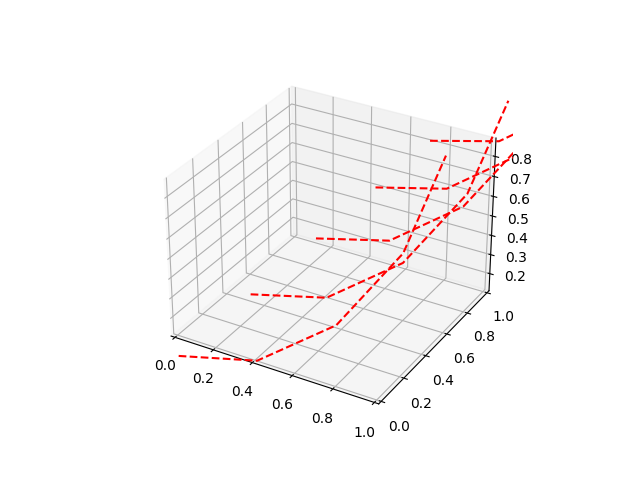

In [3]:
# Copy and Translate curve across a the z-axis

rib_spacing = 0.6
rib_count = 5
rib_angle_d = 30

%matplotlib widget

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.set_aspect('equal', adjustable='box')

points_y = np.tan(np.deg2rad(rib_angle_d))*points_z

tool_path = []

for i in range(rib_count):
    for i in range(len(points_x)):
        tool_path.append([points_x[i],points_y[i],points_z[i]])
    ax.plot(points_x,points_y,points_z, 'r--')
    points_y = points_y + rib_spacing


# Prepare G - Code

Given the set of coordinates, create tool path that moves between paths, and then send to printer over Serial

In [9]:
import serial
import time

ser = serial.Serial('COM5', 115200, timeout=None)
print('Connection Sucessful to ',ser.name)

def wait_for_ok():
    while True:
        output = ser.readline()
        if output != b'echo:busy: processing\n' and output != b'ok\n':
            print('Comm Recieved: ',output)
        if output == b'ok\n':
            break

def home_printer():
    ser.write(b'G28\r')
    wait_for_ok()

def move_to_position(x,y,z):
    ser.write(b'G0 X' + str(x).encode() + b' Y' + str(y).encode() + b' Z' + str(z).encode() + b'\r')
    wait_for_ok()



time.sleep(2)

# Home printer and move to start position
home_printer()

for i in tool_path:
    move_to_position(i[0]*20,i[1]*20,i[2]*20)

print('Done!')
ser.close()

Connection Sucessful to  COM5
Comm Recieved:  b'X:-18.00 Y:-2.00 Z:0.00 E:0.00 Count X:-1440 Y:-160 Z:0\n'
Done!


## Appendix

### Creating 3D n-gon line bounded by a sphere in spherical coordinates

In [5]:
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib widget

# n_sides = 8
# arc_sweep_theta_deg = 90
# arc_sweep_phi_deg = 90
# sphere_resolution = 100

# # Create a circular arc with n_sides

# arc_sweep_theta = np.deg2rad(arc_sweep_theta_deg)
# arc_sweep_phi = np.deg2rad(arc_sweep_phi_deg)
# angles_theta = np.linspace(0, arc_sweep_theta, n_sides, endpoint=True)
# angles_phi = np.linspace(np.pi/2,(np.pi/2)+arc_sweep_phi, n_sides, endpoint=True)

# points_x = np.sin(angles_phi) * np.cos(angles_theta)
# points_y = np.sin(angles_phi) * np.sin(angles_theta)
# points_z = np.cos(angles_phi)
# # points_z += 1

# # Plot Sphere

# fig = plt.figure()
# ax = plt.axes(projection ='3d')

# # Make data
# theta = np.linspace(0, 0.5*np.pi, sphere_resolution)
# phi = np.linspace(0.5*np.pi, np.pi,sphere_resolution)
# theta, phi = np.meshgrid(theta, phi)
# x = np.sin(phi) * np.cos(theta)
# y = np.sin(phi) * np.sin(theta)
# z = np.cos(phi)
# # z += 1

# # Plot the surface
# ax.plot_wireframe(x, y, z, alpha=0.5)
# ax.plot(points_x,points_y,points_z, 'r--')
# # ax.set_xlim([0,1])
# # ax.set_ylim([0,1])
# # ax.set_zlim([0,1])

